# Reddit Vaccine Myths

### Sentiment Analyze with Vader

In [719]:
pip install nltk

In [852]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import vader
import re
import nltk
import seaborn as sns
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [777]:
dados = pd.read_csv('reddit_vm.csv')
dados.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


### Cleaning Data

In [778]:
dados.drop(['title','id','url','created'], axis=1, inplace=True)

In [779]:
dados['timestamp'] = dados['timestamp'].str.split(' ')

In [780]:
dados['date'] = dados['timestamp'].str.slice(0,1)
dados['hour'] = dados['timestamp'].str.slice(1)

In [781]:
x = []
for n in dados['date']:
  x.append(str(n)[1:-1])

In [782]:
dados['date'] = x

In [783]:
y = []
for z in dados['hour']:
  y.append(str(z)[1:-1])

In [784]:
dados['hour'] = y

In [785]:
dados.drop('timestamp', axis=1, inplace=True)

In [786]:
no_aps = []
for l in dados['date']:
  no_aps.append(l.replace("'", ""))

In [787]:
dados['date'] = no_aps

In [788]:
no_aps = []
for j in dados['hour']:
  no_aps.append(j.replace("'", ""))

In [789]:
dados['hour'] = no_aps

In [790]:
dados['date'] = pd.to_datetime(dados['date'], format="%Y-%m-%d")
dados['hour'] = pd.to_datetime(dados['hour'], format="%H:%M:%S")

In [791]:
dados['year'] = dados['date'].map(lambda x: x.strftime("%Y"))
dados['month'] = dados['date'].map(lambda x: x.strftime("%m"))
dados['hour'] = dados['hour'].map(lambda x: x.strftime("%H"))

In [792]:
dados.dropna(inplace=True)

In [793]:
dados['body'] = dados['body'].str.lower()
dados['body'] = dados['body'].apply(lambda x: re.sub(r'[\@\:\_\.\;\#\"\'\$\%\&\/]', "", str(x)))

In [794]:
dados['body'] = dados['body'].apply(lambda x: x.replace("https", ""))

In [795]:
dados.head()

,score,comms_num,body,date,hour,year,month
6,1,0,your op its not a myth only one vaccine contai...,2019-03-25,02,2019,03
7,10,8,youtubezbkvcpbnnku,2020-04-23,20,2020,04
8,0,0,because anti-vaxxers have no sense,2020-04-24,23,2020,04
9,0,0,what do you mean by your op i am fairly new to...,2019-03-25,02,2019,03
10,1,0,"when they say theres no thimerasol, they mean ...",2019-03-25,02,2019,03


### Sentiment Analyze

In [796]:
sentiment = vader.SentimentIntensityAnalyzer()

In [797]:
sentiments = [sentiment.polarity_scores(i) for i in dados['body'].values]

In [798]:
dados['Negative Score'] = [i['neg'] for i in sentiments]
dados['Positivo Score'] = [i['pos'] for i in sentiments]
dados['Neuter Score'] = [i['neu'] for i in sentiments]
dados['Compound Score'] = [i['compound'] for i in sentiments]

In [743]:
dados.head()

,score,comms_num,body,date,hour,year,month,Negative Score,Positivo Score,Neuter Score,Compound Score
6,1,0,your op its not a myth only one vaccine contai...,2019-03-25,02,2019,03,0.000,0.0,1.000,0.000
7,10,8,youtubezbkvcpbnnku,2020-04-23,20,2020,04,0.000,0.0,1.000,0.000
8,0,0,because anti-vaxxers have no sense,2020-04-24,23,2020,04,0.355,0.0,0.645,-0.296
9,0,0,what do you mean by your op i am fairly new to...,2019-03-25,02,2019,03,0.000,0.0,1.000,0.000
10,1,0,"when they say theres no thimerasol, they mean ...",2019-03-25,02,2019,03,0.136,0.0,0.864,-0.296


In [799]:
score = dados['Compound Score'].values

In [800]:
t = []
for v in score:
  if v >= 0.05:
    t.append('Positive')
  elif v <= -0.05:
    t.append('Negative')
  else:
    t.append("Neuter")

dados['Sentimen'] = t

In [746]:
dados.head()

,score,comms_num,body,date,hour,year,month,Negative Score,Positivo Score,Neuter Score,Compound Score,Sentimen
6,1,0,your op its not a myth only one vaccine contai...,2019-03-25,02,2019,03,0.000,0.0,1.000,0.000,Neuter
7,10,8,youtubezbkvcpbnnku,2020-04-23,20,2020,04,0.000,0.0,1.000,0.000,Neuter
8,0,0,because anti-vaxxers have no sense,2020-04-24,23,2020,04,0.355,0.0,0.645,-0.296,Negative
9,0,0,what do you mean by your op i am fairly new to...,2019-03-25,02,2019,03,0.000,0.0,1.000,0.000,Neuter
10,1,0,"when they say theres no thimerasol, they mean ...",2019-03-25,02,2019,03,0.136,0.0,0.864,-0.296,Negative


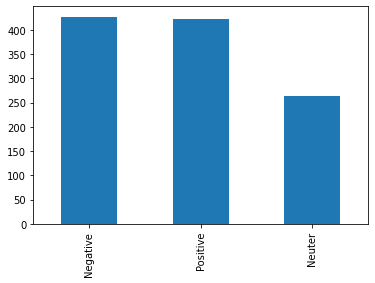

In [801]:
dados['Sentimen'].value_counts().plot(kind='bar')

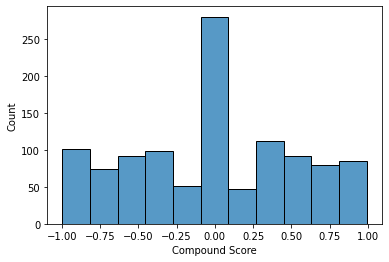

In [861]:
sns.histplot(dados['Compound Score'], bins=11)

In [802]:
dados = pd.concat([dados, pd.get_dummies(dados['Sentimen'])], axis=1)
dados.head()

,score,comms_num,body,date,hour,year,month,Negative Score,Positivo Score,Neuter Score,Compound Score,Sentimen,Negative,Neuter,Positive
6,1,0,your op its not a myth only one vaccine contai...,2019-03-25,02,2019,03,0.000,0.0,1.000,0.000,Neuter,0,1,0
7,10,8,youtubezbkvcpbnnku,2020-04-23,20,2020,04,0.000,0.0,1.000,0.000,Neuter,0,1,0
8,0,0,because anti-vaxxers have no sense,2020-04-24,23,2020,04,0.355,0.0,0.645,-0.296,Negative,1,0,0
9,0,0,what do you mean by your op i am fairly new to...,2019-03-25,02,2019,03,0.000,0.0,1.000,0.000,Neuter,0,1,0
10,1,0,"when they say theres no thimerasol, they mean ...",2019-03-25,02,2019,03,0.136,0.0,0.864,-0.296,Negative,1,0,0


In [812]:
dados2 = dados.groupby('year').mean()
dados2

,score,comms_num,Negative Score,Positivo Score,Neuter Score,Compound Score,Negative,Neuter,Positive
year,,,,,,,,,
2014,4.375000,5.625000,0.123500,0.082375,0.794250,-0.163550,0.500000,0.125000,0.375000
2015,0.000000,3.000000,0.079000,0.000000,0.921000,-0.340000,1.000000,0.000000,0.000000
2016,9.000000,4.500000,0.071000,0.067000,0.862000,0.135000,0.500000,0.000000,0.500000
2017,1.000000,5.500000,0.053500,0.098500,0.847500,0.567750,0.000000,0.000000,1.000000
2018,13.000000,3.000000,0.047200,0.211600,0.741200,0.434240,0.000000,0.400000,0.600000
2019,1.806405,1.149927,0.089159,0.115640,0.789390,-0.022755,0.388646,0.231441,0.379913
2020,1.872792,0.360424,0.114703,0.109286,0.772456,0.014106,0.385159,0.236749,0.378092
2021,1.920000,0.464000,0.096128,0.089824,0.814088,0.012410,0.360000,0.272000,0.368000


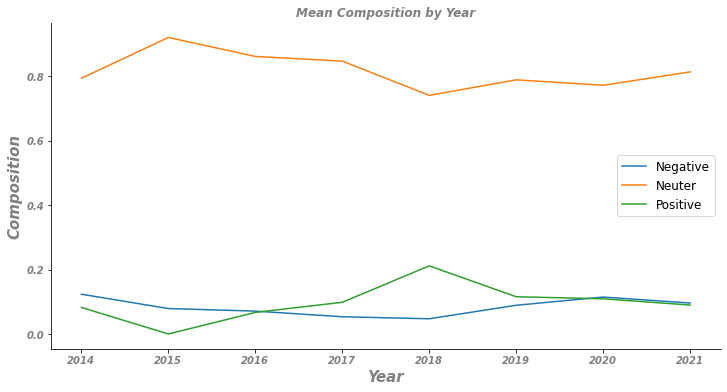

In [841]:
ax, fig = plt.subplots(figsize=(12,6))
plt.plot(dados2.index, dados2['Negative Score'], label='Negative')
plt.plot(dados2.index, dados2['Neuter Score'], label='Neuter')
plt.plot(dados2.index, dados2['Positivo Score'], label='Positive')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
plt.title('Mean Composition by Year', fontsize=12, color='grey', style='oblique', fontweight='bold')
plt.xticks(color='grey', style='oblique', fontweight='bold')
plt.yticks(color='grey', style='oblique', fontweight='bold')
plt.xlabel("Year", fontsize=15, color='grey', style='oblique', fontweight='bold')
plt.ylabel("Composition", fontsize=15, color='grey', style='oblique', fontweight='bold')
plt.legend(fontsize=12)
plt.show()

In [830]:
dados3 = dados.groupby('hour').mean()
dados3.head()

,score,comms_num,Negative Score,Positivo Score,Neuter Score,Compound Score,Negative,Neuter,Positive
hour,,,,,,,,,
00,1.632653,0.734694,0.093265,0.119184,0.787571,0.058290,0.326531,0.224490,0.448980
01,1.479167,0.229167,0.074938,0.160812,0.722562,0.156481,0.250000,0.208333,0.541667
02,1.828125,0.656250,0.091328,0.080813,0.827766,-0.055700,0.359375,0.375000,0.265625
03,1.880000,0.180000,0.114060,0.109160,0.776820,-0.132310,0.500000,0.180000,0.320000
04,1.903846,4.096154,0.098077,0.122885,0.779038,-0.068212,0.500000,0.115385,0.384615


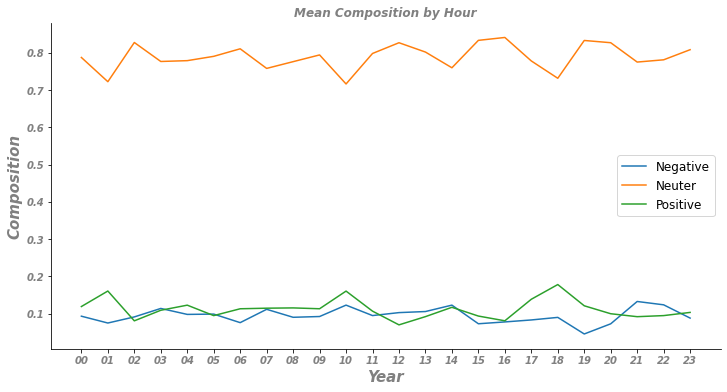

In [842]:
ax, fig = plt.subplots(figsize=(12,6))
plt.plot(dados3.index, dados3['Negative Score'], label='Negative')
plt.plot(dados3.index, dados3['Neuter Score'], label='Neuter')
plt.plot(dados3.index, dados3['Positivo Score'], label='Positive')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
plt.title('Mean Composition by Hour', fontsize=12, color='grey', style='oblique', fontweight='bold')
plt.xticks(color='grey', style='oblique', fontweight='bold')
plt.yticks(color='grey', style='oblique', fontweight='bold')
plt.xlabel("Year", fontsize=15, color='grey', style='oblique', fontweight='bold')
plt.ylabel("Composition", fontsize=15, color='grey', style='oblique', fontweight='bold')
plt.legend(fontsize=12)
plt.show()

In [843]:
dados4 = dados.groupby('month').mean()
dados4.head()

,score,comms_num,Negative Score,Positivo Score,Neuter Score,Compound Score,Negative,Neuter,Positive
month,,,,,,,,,
01,2.584416,1.012987,0.105201,0.112338,0.782448,0.062350,0.363636,0.227273,0.409091
02,2.183099,1.676056,0.099577,0.064592,0.835817,-0.034115,0.394366,0.281690,0.323944
03,1.373239,1.866197,0.095486,0.097577,0.806958,-0.030932,0.394366,0.225352,0.380282
04,1.435065,0.941558,0.082942,0.097552,0.800026,0.002403,0.363636,0.279221,0.357143
05,1.745098,0.411765,0.098229,0.103654,0.791569,-0.006408,0.352941,0.281046,0.366013


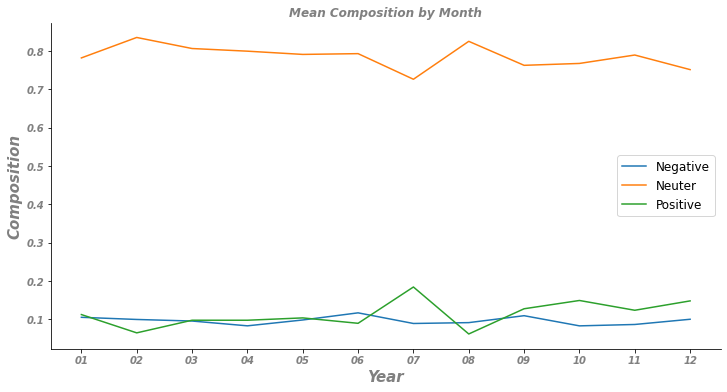

In [844]:
ax, fig = plt.subplots(figsize=(12,6))
plt.plot(dados4.index, dados4['Negative Score'], label='Negative')
plt.plot(dados4.index, dados4['Neuter Score'], label='Neuter')
plt.plot(dados4.index, dados4['Positivo Score'], label='Positive')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
plt.title('Mean Composition by Month', fontsize=12, color='grey', style='oblique', fontweight='bold')
plt.xticks(color='grey', style='oblique', fontweight='bold')
plt.yticks(color='grey', style='oblique', fontweight='bold')
plt.xlabel("Year", fontsize=15, color='grey', style='oblique', fontweight='bold')
plt.ylabel("Composition", fontsize=15, color='grey', style='oblique', fontweight='bold')
plt.legend(fontsize=12)
plt.show()